<h1><em>EDA focusing on South African Crime </em></h1>
<h3><em>Purpose: </em><h3>
    <ul>
        <li>To further one's Knowledge.</li>
        <li>To analyse, validate, process data, and offer unbiased information. </li>
        <li>To potentially use as a foundation for a larger more indepth project.</li>
    </ul>


<p>South Africa, officially the Republic of South Africa, is the southernmost country in Africa. </p>

In [1]:
from IPython.display import Image
Image(url='https://www.worldofmaps.net/typo3temp/images/karte-regionen-suedafrika.png', width=500, height=500)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [4]:
import os

In [5]:
for file in os.listdir():
    if file.endswith("xlsx"):
        print(file)

crime-stats-all-2011-2012-to-2022-2023.xlsx


In [6]:
!pip install openpyxl --quiet

In [7]:
# Read in the entire file
xlsx = pd.read_excel("crime-stats-all-2011-2012-to-2022-2023.xlsx",sheet_name=None)

In [8]:
type(xlsx)

dict

In [9]:
# Read and write out each sheet name
for k in xlsx.keys():
    print(k)

Crime incidents by category
Contact crime incidents by cate
Sexual offence incidents by cat
Aggravated robbery incidents by
Contact related crime incidents
Property related crime incident
Other serious crime incidents b
Crimes detected as a result of 


In [10]:
# Grab a sheet that happens to be the first
crimeIncidents_rawDf = xlsx["Crime incidents by category"]


In [11]:
# Overview of the data
crimeIncidents_rawDf

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223
...,...,...,...,...
835,WC,Aggravated Robberies,2022/2023,7150
836,WC,Contact Related Crimes,2022/2023,28595
837,WC,Property Related Crimes,2022/2023,66272
838,WC,Other Serious Crimes,2022/2023,96174


In [12]:
# Determine if there are NaN Values 
crimeIncidents_rawDf.isna().sum() # No NAN :) 

Geography         0
Crime Category    0
Financial Year    0
Count             0
dtype: int64

In [13]:
crimeIncidents_rawDf.Geography.unique() # All unique Geographical locations used == 9 Provinces  + ZA(South Africa)
# Zuid-Afrika ??? The DUTCH!!!

array(['ZA', 'EC', 'FS', 'GT', 'KZN', 'LIM', 'MP', 'NW', 'NC', 'WC'],
      dtype=object)

In [14]:
crimeIncidents_rawDf.Geography.value_counts() # Interesting, equal spread of K:V pairs

ZA     84
EC     84
FS     84
GT     84
KZN    84
LIM    84
MP     84
NW     84
NC     84
WC     84
Name: Geography, dtype: int64

In [15]:
crimeIncidents_rawDf['Crime Category'].unique() # Grab all types of Crime, duplicates excluded

array(['Contact Crimes', 'Sexual Offences', 'Aggravated Robberies',
       'Contact Related Crimes', 'Property Related Crimes',
       'Other Serious Crimes',
       'Crimes Detected as a Result of Police Action'], dtype=object)

In [16]:
crimeIncidents_rawDf['Crime Category'].value_counts() # HOWWWW

Contact Crimes                                  120
Sexual Offences                                 120
Aggravated Robberies                            120
Contact Related Crimes                          120
Property Related Crimes                         120
Other Serious Crimes                            120
Crimes Detected as a Result of Police Action    120
Name: Crime Category, dtype: int64

Each Geography has 10 instances of each Crime Category for each Financial Year, with the associated number of occurences of that 
crime for that given year

In [17]:
crimeIncidents_rawDf['Financial Year'].unique()

array(['2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021',
       '2021/2022', '2022/2023'], dtype=object)

In [18]:
# Should be 70 each as we have 10 unique Geography's with 7 unique Crime Category's therefore 10 x 7 == 70

crimeIncidents_rawDf['Financial Year'].value_counts()

2011/2012    70
2012/2013    70
2013/2014    70
2014/2015    70
2015/2016    70
2016/2017    70
2017/2018    70
2018/2019    70
2019/2020    70
2020/2021    70
2021/2022    70
2022/2023    70
Name: Financial Year, dtype: int64

In [19]:
crimeIncidents_rawDf.loc[0] # Looking at a row

Geography                     ZA
Crime Category    Contact Crimes
Financial Year         2011/2012
Count                     615935
Name: 0, dtype: object

In [20]:
crimeIncidents_rawDf.head(2) # Grab the first 2 rows for reference 

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724


In [21]:
crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Financial Year'] == "2011/2012") ].loc[0].Count

615935

In [22]:
crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Financial Year'] == "2011/2012") ]

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
100,ZA,Sexual Offences,2011/2012,60539
200,ZA,Aggravated Robberies,2011/2012,100769
300,ZA,Contact Related Crimes,2011/2012,125903
400,ZA,Property Related Crimes,2011/2012,530624
500,ZA,Other Serious Crimes,2011/2012,528296
600,ZA,Crimes Detected as a Result of Police Action,2011/2012,262726


In [23]:
# I would expect the Financial Year and associated Count for ZA to be the sum of every province for that same Year and index

crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography != "ZA") & (crimeIncidents_rawDf['Financial Year'] == "2011/2012")  & (crimeIncidents_rawDf['Crime Category'] == "Contact Crimes") ].Count.sum()

615935

In [24]:
# Theory Confirmed -> We now know the ZA instances(rows) is an aggregate for the Crime catergory for the given financial year 

In [25]:
crimeIncidents_rawDf

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223
...,...,...,...,...
835,WC,Aggravated Robberies,2022/2023,7150
836,WC,Contact Related Crimes,2022/2023,28595
837,WC,Property Related Crimes,2022/2023,66272
838,WC,Other Serious Crimes,2022/2023,96174


## Analysis and Inference Thus far:

<p>We can very confidently say,our data from the sheet "Crime incidents by category" is clean, well documented, well structured</p>

<p>We can <em>summarise</em> the data as follows: </p>

1) The data categorises Geography's, associated crime category, for a given financial year, if the Geography is ZA the Count is the cumsum of all other Geography's for the given Financial year. Else: The Count is the number of occurences of a specific crime category for a given year.


<p>We now begin Plotting our data in an effort to gain deeper insights and understanding. </p>

In [26]:
crimeIncidents_rawDf['Crime Category'].unique()

array(['Contact Crimes', 'Sexual Offences', 'Aggravated Robberies',
       'Contact Related Crimes', 'Property Related Crimes',
       'Other Serious Crimes',
       'Crimes Detected as a Result of Police Action'], dtype=object)

In [27]:
# Let's begin with selecting a Crime Catergory for the Geography ZA and determine how the data has changed over the years

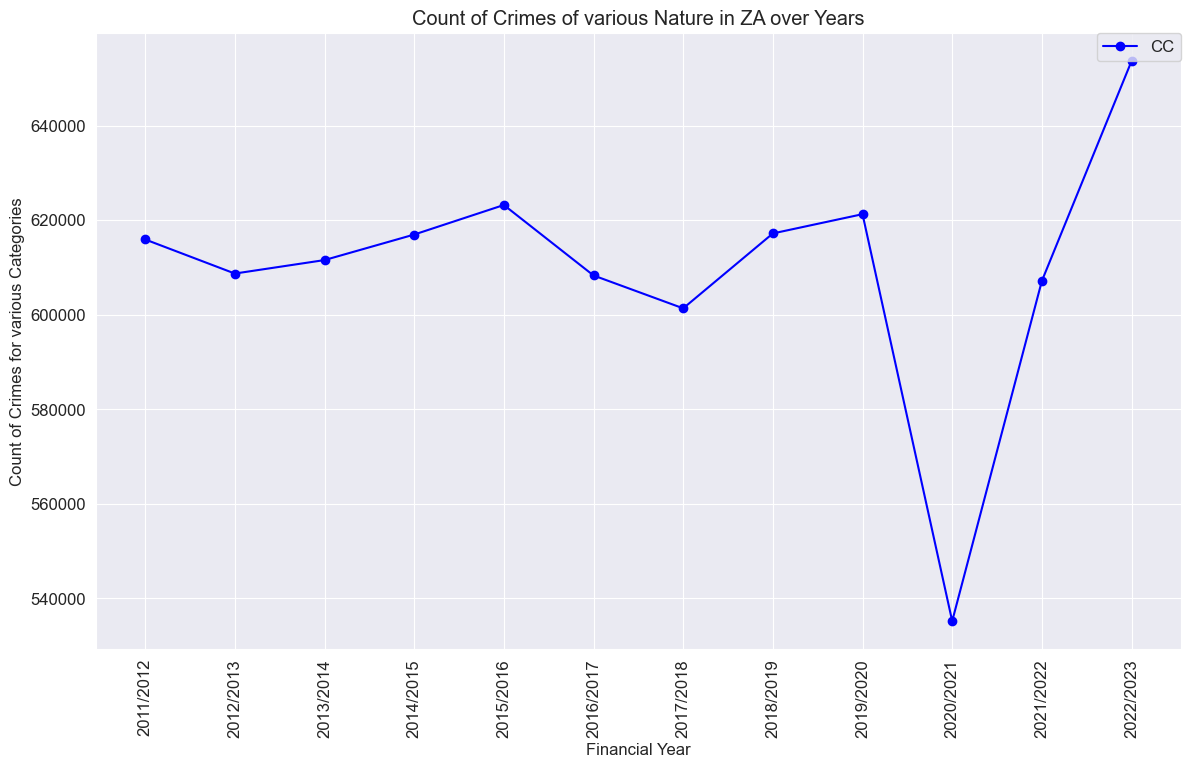

In [28]:
# The x-axis will be the Financial Years
# The y-axis will be the Counts for a Given Crime Category

years = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA")]['Financial Year'].unique()

contactCrimeCount = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Crime Category'] == "Contact Crimes")].Count.values
sexualCrimeCount = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Crime Category'] == "Sexual Offences")].Count.values
policeActionCrimeCount = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Crime Category'] == "Crimes Detected as a Result of Police Action")].Count.values
aggravatedRobberiesCount = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Crime Category'] == "Aggravated Robberies")].Count.values
contactRelatedCrimeCount = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Crime Category'] == "Contact Related Crimes")].Count.values


plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

plt.plot(years, contactCrimeCount,'o-b')
# plt.plot(years,sexualCrimeCount,'s--r')
# plt.plot(years,policeActionCrimeCount,'*:c')
# plt.plot(years,aggravatedRobberiesCount,'h-k')
# plt.plot(years,contactRelatedCrimeCount,'p--y')

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes for various Categories')
plt.title('Count of Crimes of various Nature in ZA over Years')
plt.legend(["CC", "SO","PAC","ARC","CRC"],loc="upper right",borderaxespad=0)

plt.show();


In [29]:
crimeIncidents_rawDf['Crime Category'].unique()

array(['Contact Crimes', 'Sexual Offences', 'Aggravated Robberies',
       'Contact Related Crimes', 'Property Related Crimes',
       'Other Serious Crimes',
       'Crimes Detected as a Result of Police Action'], dtype=object)

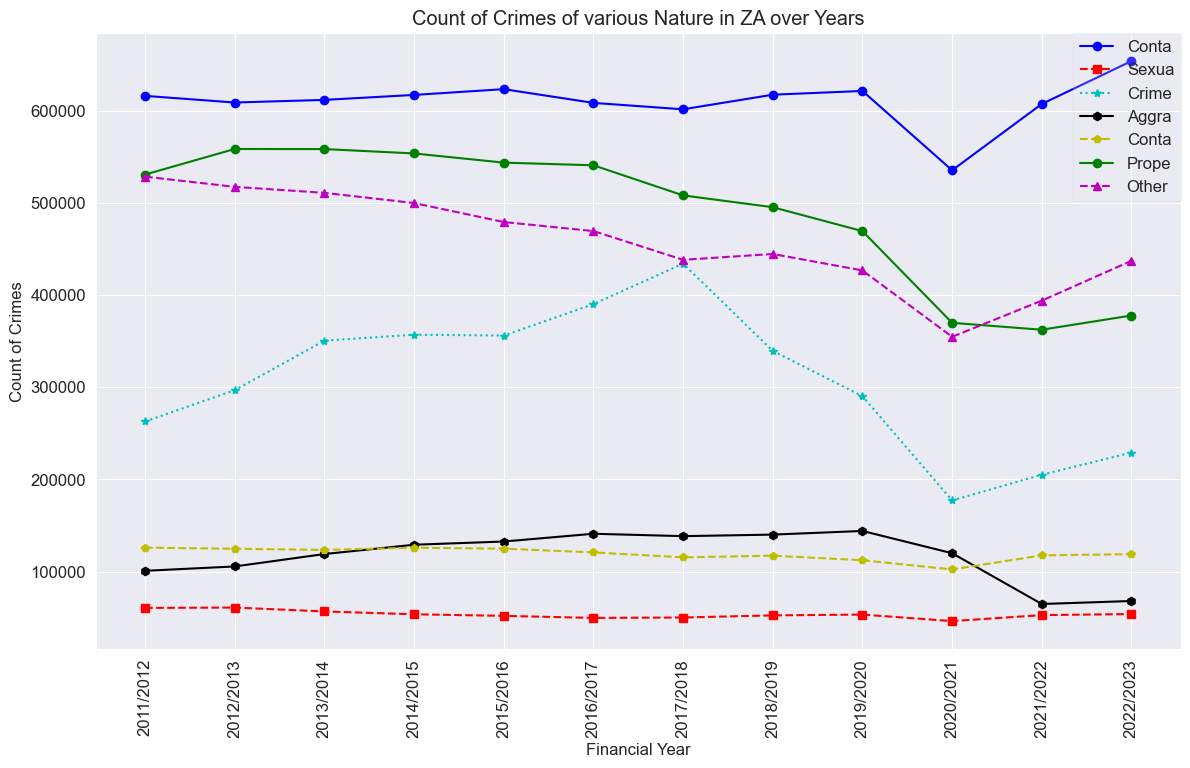

In [30]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in ZA over Years')

keys = categories.keys()
truncated_keys = [key[:5] for key in keys]
legend = plt.legend(truncated_keys, loc="upper right", borderaxespad=0)
legend.get_frame().set_alpha(0.2)

plt.show()


In [31]:
crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Financial Year'] == "2011/2012")]

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
100,ZA,Sexual Offences,2011/2012,60539
200,ZA,Aggravated Robberies,2011/2012,100769
300,ZA,Contact Related Crimes,2011/2012,125903
400,ZA,Property Related Crimes,2011/2012,530624
500,ZA,Other Serious Crimes,2011/2012,528296
600,ZA,Crimes Detected as a Result of Police Action,2011/2012,262726


In [32]:
for year in crimeIncidents_rawDf['Financial Year'].unique():
    print(crimeIncidents_rawDf.Count[(crimeIncidents_rawDf.Geography == "ZA") & (crimeIncidents_rawDf['Financial Year'] == year)].unique())
    print()

[615935  60539 100769 125903 530624 528296 262726]

[608724  60888 105488 124691 558334 517252 296734]

[611574  56680 118963 123441 558228 510748 350403]

[616973  53617 129045 125789 553487 499698 356919]

[623223  51895 132527 124804 543524 479075 355926]

[608321  49660 140956 120730 540653 469276 390021]

[601366  50108 138364 115361 507975 438113 433966]

[617210  52420 140032 117172 495161 444447 339281]

[621282  53293 143990 112244 469224 426569 290176]

[535217  46214 119841 102269 369745 354566 177095]

[607163  52694  64759 117505 362274 393821 204990]

[653659  53888  68015 118816 377690 437038 228983]



<!-- Contact Crimes: These are crimes where the victims themselves are the targets of violence or property is targeted and the victims in the vicinity of the crime are subjected to threats of violence or the use of violence12. They include crimes like murder, assault, sexual offences, etc34.

Sexual Offences: These are crimes that involve any unwanted sexual activity whether on the physical, intellectual, or mental degree of consciousness which leads to suppression of will of the victim by invading personal space where the victim feels coerced or manipulated and which involves infliction of pain5678.

Aggravated Robberies: These are robberies made more serious by its violent circumstances91011. They include crimes like carjacking, house and business robberies, and bank and cash-in-transit robberies9.

Contact Related Crimes: These are violent crimes committed against property with the intention of causing damage to a person, for example arson or malicious damage to property12.

Property Related Crimes: These are crimes involving the destruction, theft, or vandalism of private property131415. They include crimes like malicious injury to property, arson, robbery, shoplifting, burglary, vandalism, theft, larceny, trespassing, and extortion13.

Other Serious Crimes: This category typically includes more serious crimes, including violent crimes like first-degree murder1617. The exact crimes included in this category can vary depending on the jurisdiction1819.

Crimes Detected as a Result of Police Action: These are crimes discovered by active policing, such as roadblocks and raids20212223. This category covers the illegal possession of firearms, DUI or driving under the influence (of drugs or alcohol), and the use, possession, or trade of illegal drugs -->

<h2> What can we say? </h2>
    
<p>Without any order</p>
<ul>
    <li> These may not be mutually exclusive events, A crime may fall into multiple categories depending on a multitude of factors, such as severity of the actions taken, it would be difficult to estimate the number of non-overlapping counts of crime </li>
    <li> We notice the period 2019/2020 to 2020/2021 saw a decrease in every Crime -> Why may this be? (Covid-19 + Lockdown) </li>
    <li>Post lockdown, what we expect to happen, happens: Every crime category excluding (AR,PRC) increased, the category CC Saw a large increase, now sitting at a level higher than ever</li>
    <li>This does raise a few questions: Why was the goverment security entities (All armed services meant to serve and protect) unable to take advantage of the situation and maintain order? </li>
    <li>Why did some crime increase and some decrease? </li>
</ul>

In [33]:
crimeIncidents_rawDf.head(15)

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223
5,ZA,Contact Crimes,2016/2017,608321
6,ZA,Contact Crimes,2017/2018,601366
7,ZA,Contact Crimes,2018/2019,617210
8,ZA,Contact Crimes,2019/2020,621282
9,ZA,Contact Crimes,2020/2021,535217


Let us do something very simple, we will repeat the plot but for each indivual province.
This will be very revealing

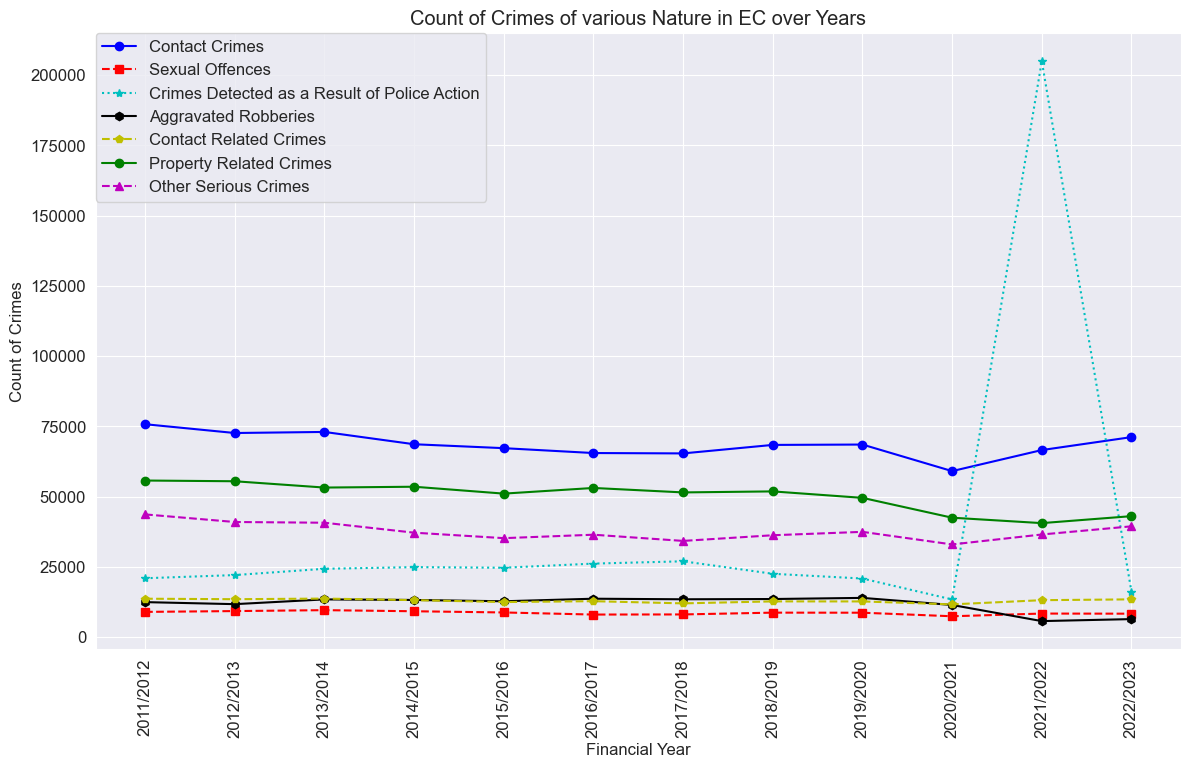

In [34]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "EC") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in EC over Years') # One province 
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show();

<h2>EC Crime analysis over the years</h2>

<p>Let us break our analysis into 3 sections: Pre-Covid, Intra-Covid, and Post-Covid</p>

<ol>
    Pre-Covid
    <li>We notice that every crime catergory except Aggrevated robberies, and Sexual offences were on a down trend</li>
    <li>This could be due to a many factors, police intervention, stronger laws, etc</li>
    <li> We notice "Crimes detected due to Police intervention" line peaked in the FY 2017/2018, if things are as I stated eariler, then these events might overlap and an increase in "C D D T P I" is a good thing, it shows active policing </li>
    <li> Contact crimes still seems to be the dominant crime, again this could be due to overlap. </li>    
</ol>

<ol>
    Intra-Covid
    <li>As expected, people being confined, restricted movements, led to a decrease in all Crime during covid as there were less opportunities for crime, this is nothing to be excited about, this would have happened everywhere.</li>
</ol>


<ol>
    Post-Covid
    <li>Exclusing "PRC" and "AR" every crime category saw an increase</li>
    <li>"Crimes detected as a Result of Police Action" practically experienced a 10x increase, this is GOOD.</li>
    <li>IT is an indication of ACTIVE POLICING, hopefully these led to corrective action</li>
</ol>




In [35]:
crimeIncidents_rawDf.Geography.unique()

array(['ZA', 'EC', 'FS', 'GT', 'KZN', 'LIM', 'MP', 'NW', 'NC', 'WC'],
      dtype=object)

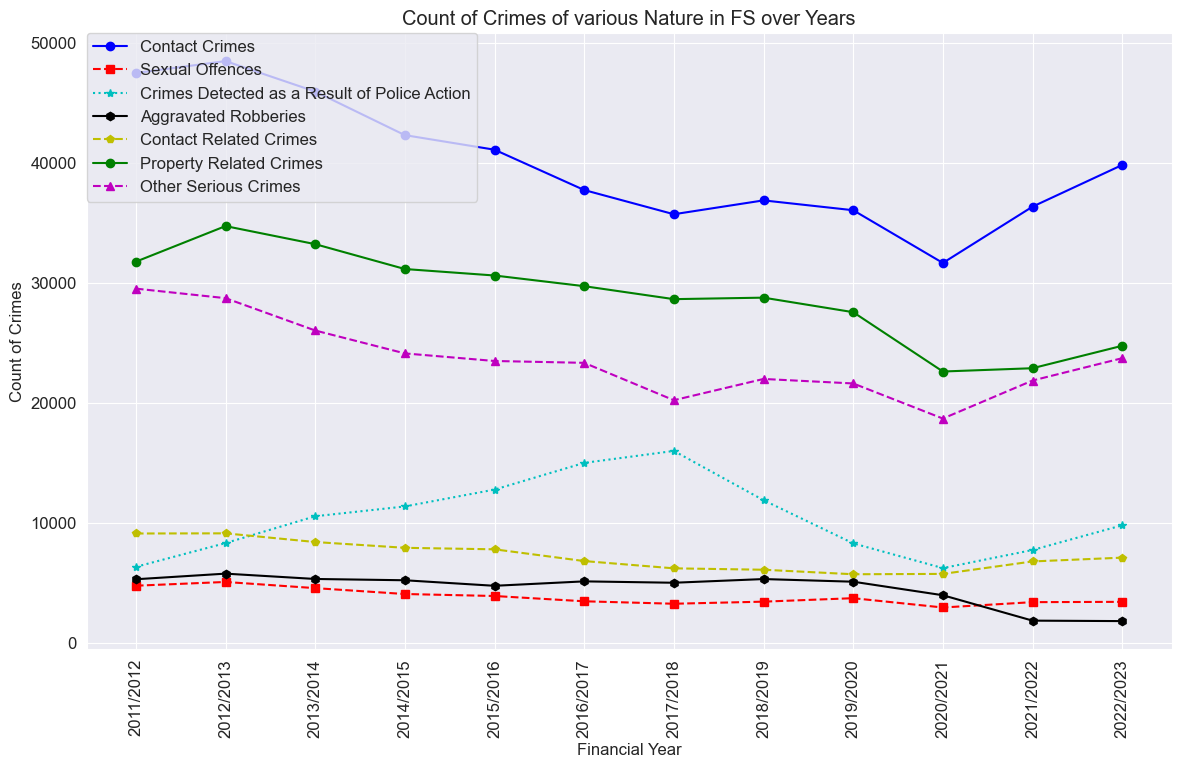

In [36]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "FS") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in FS over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

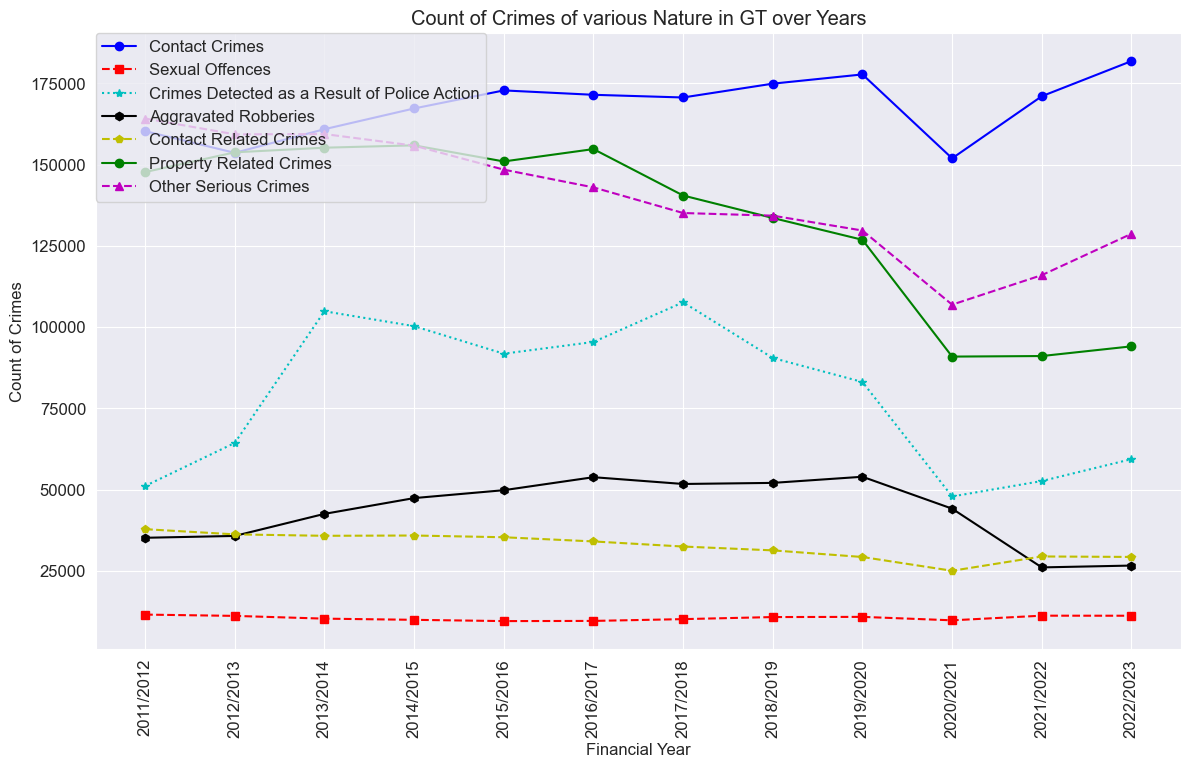

In [37]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "GT") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in GT over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

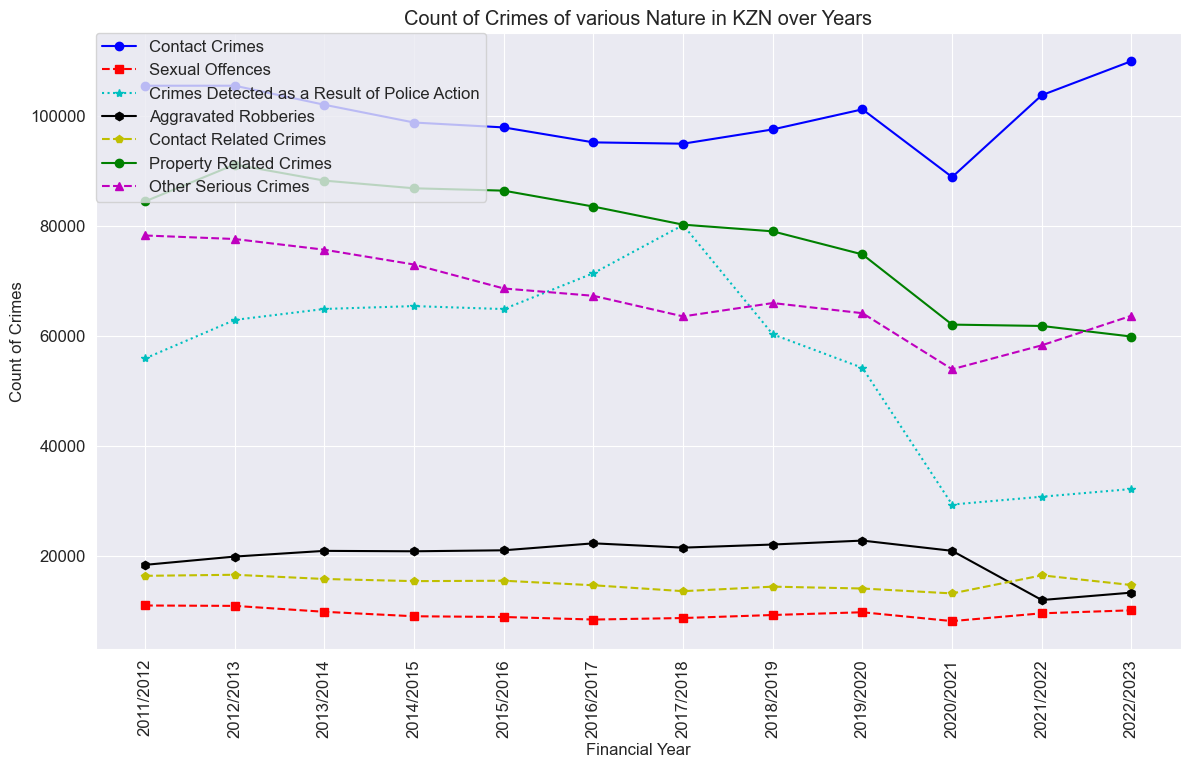

In [38]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "KZN") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in KZN over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show();

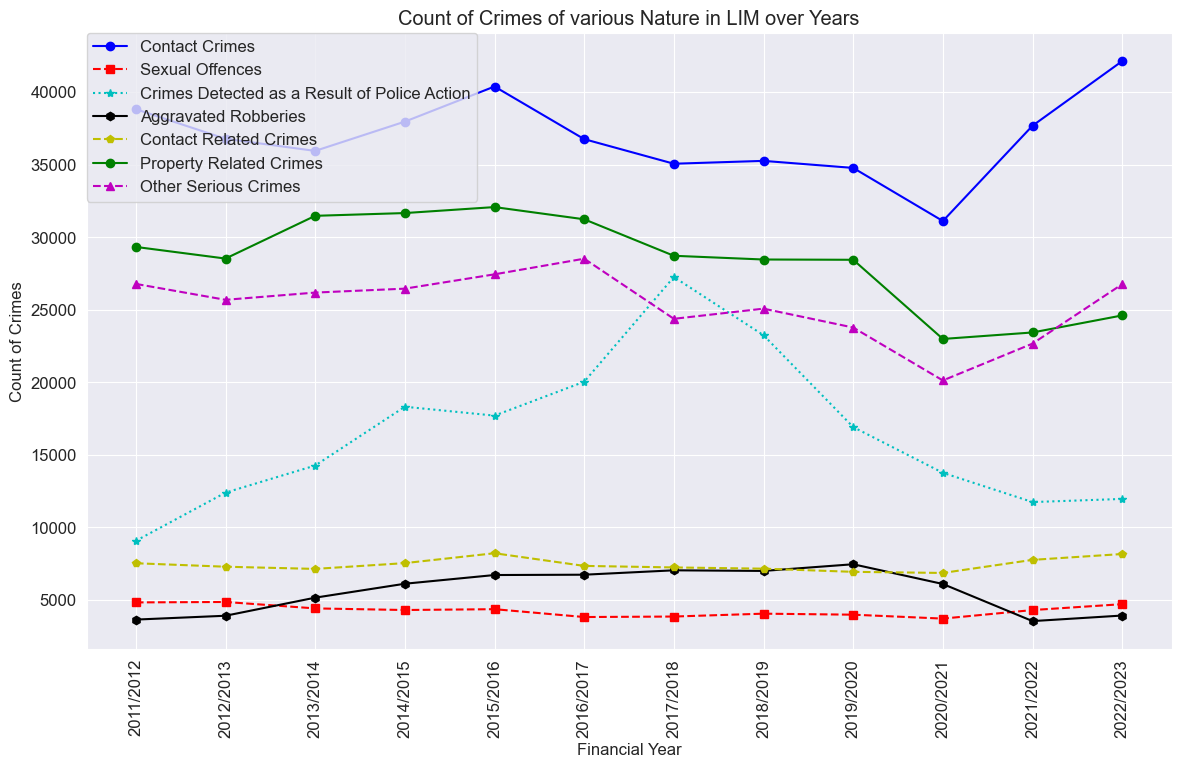

In [39]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "LIM") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in LIM over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

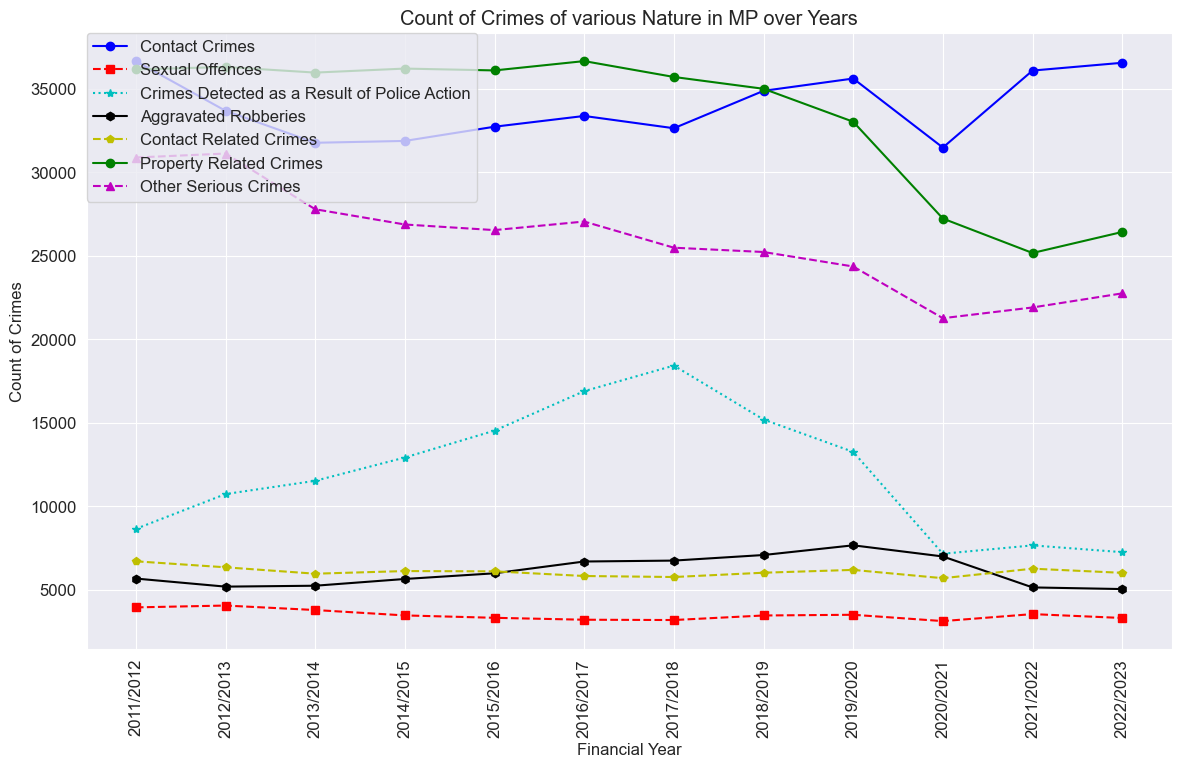

In [40]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "MP") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in MP over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

In [41]:
crimeIncidents_rawDf.Geography.unique()

array(['ZA', 'EC', 'FS', 'GT', 'KZN', 'LIM', 'MP', 'NW', 'NC', 'WC'],
      dtype=object)

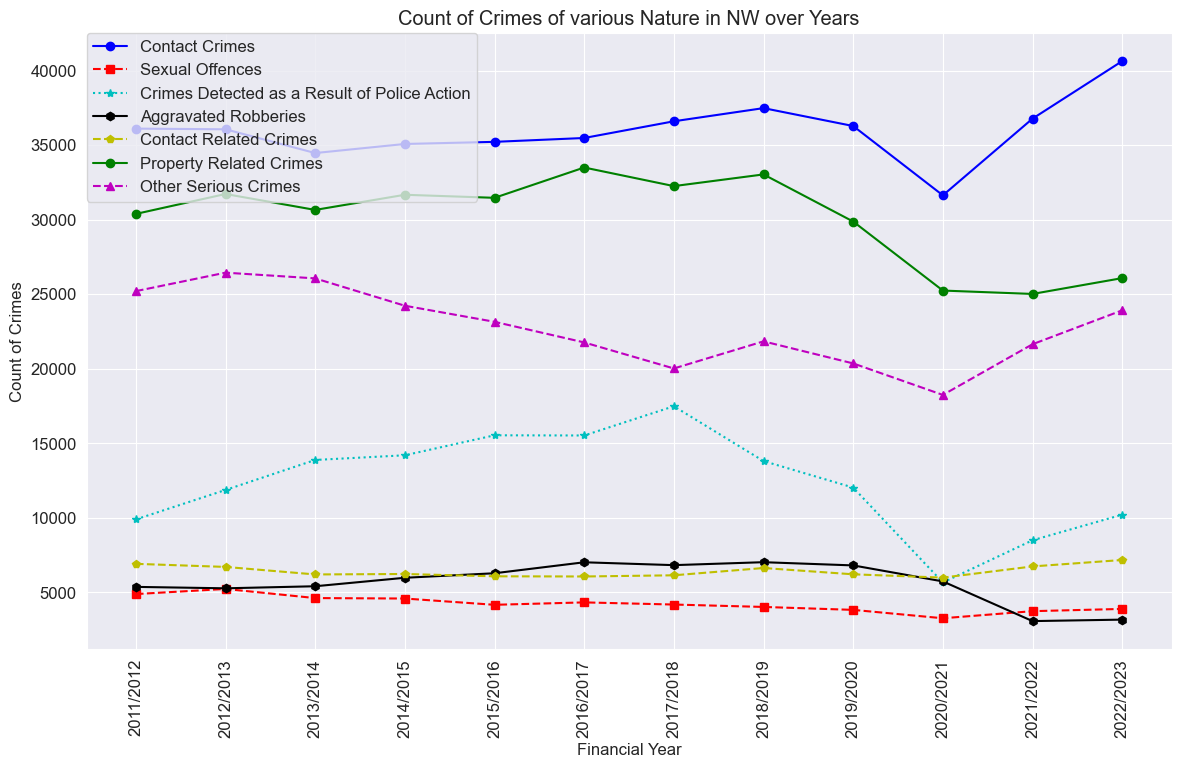

In [42]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "NW") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in NW over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

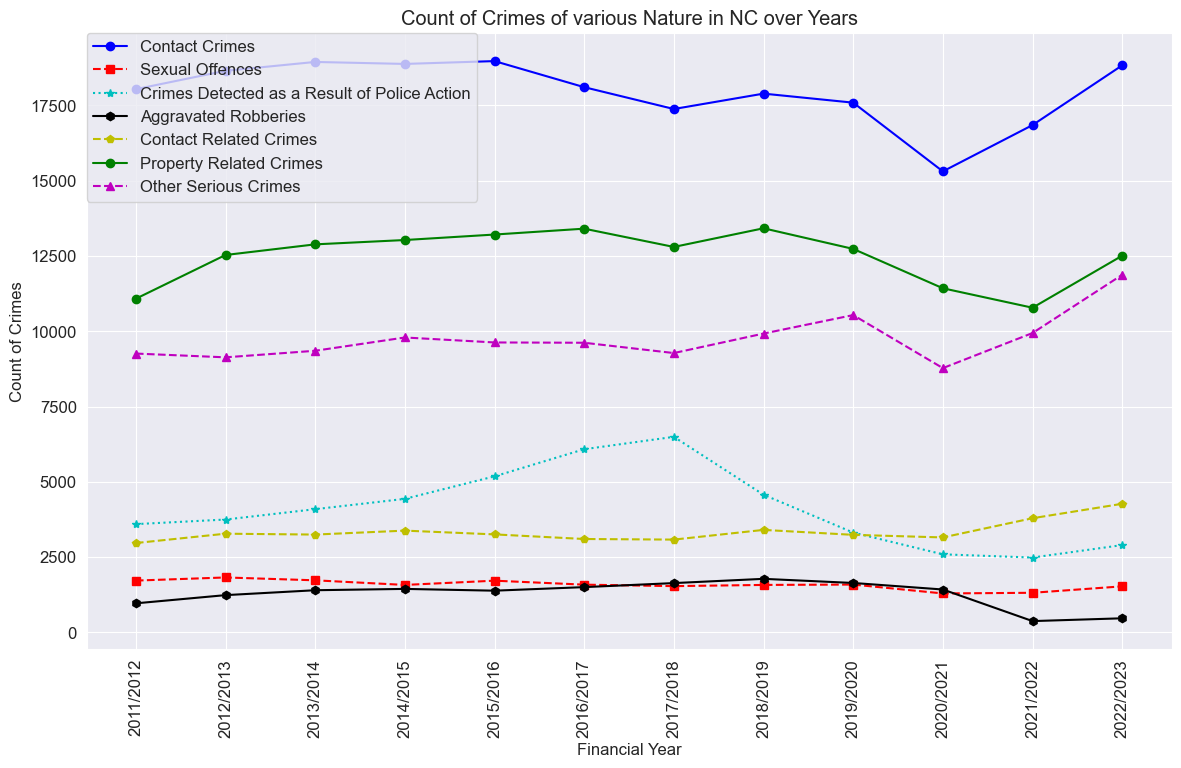

In [43]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "NC") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in NC over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

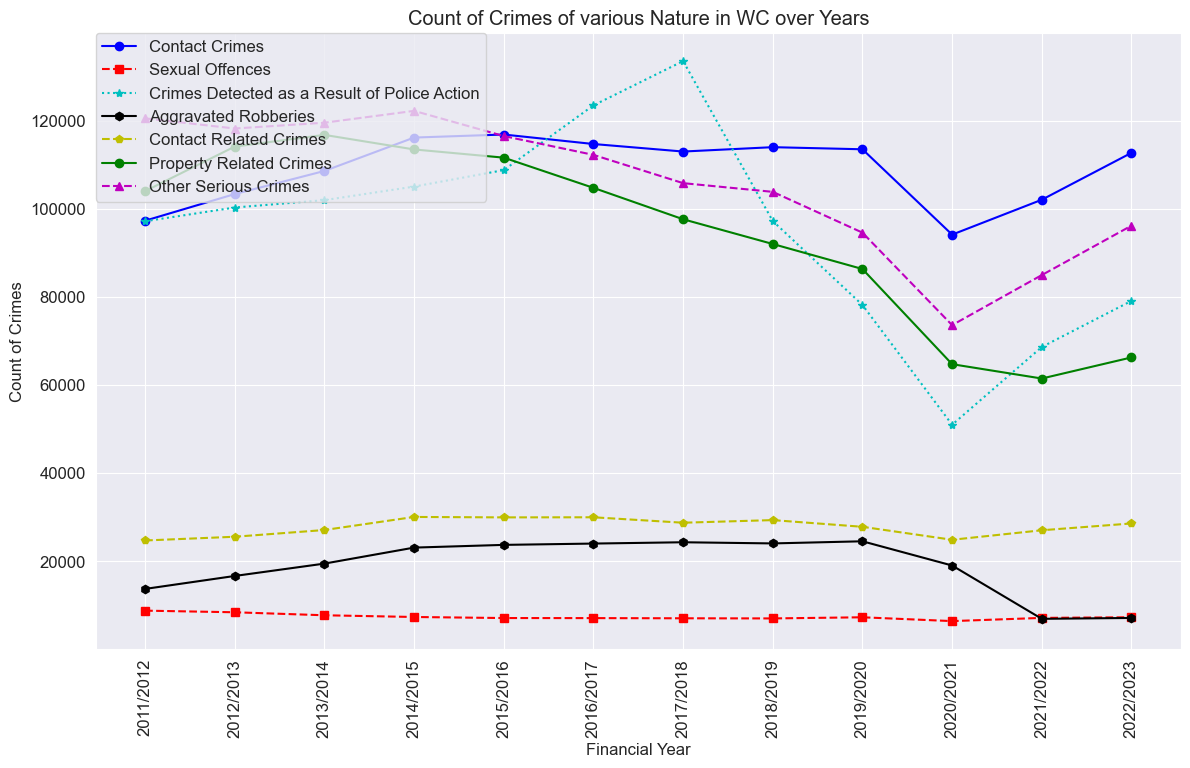

In [44]:
# The shortcut
# Define the categories and their corresponding plot styles
categories = {
    "Contact Crimes": 'o-b',
    "Sexual Offences": 's--r',
    "Crimes Detected as a Result of Police Action": '*:c',
    "Aggravated Robberies": 'h-k',
    "Contact Related Crimes": 'p--y',
    "Property Related Crimes": 'o-g',
    "Other Serious Crimes": '^--m'
    
}

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)

# Loop over the categories
for category, style in categories.items():
    # Filter the data for the current category
    category_data = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "WC") & (crimeIncidents_rawDf['Crime Category'] == category)].Count.values
    # Plot the data
    plt.plot(years, category_data, style)

plt.xlabel('Financial Year')
plt.ylabel('Count of Crimes')
plt.title('Count of Crimes of various Nature in WC over Years')
plt.legend(categories.keys(),loc="upper left",borderaxespad=0)

plt.show()

In [45]:
# I want to create a barplot where the x-axis is the Geography for the associated year and the y-axis is the Crime Count

In [46]:
# grouped_df = raw_df.groupby(['citizenship','gender']).size().reset_index(name='fatality')

# sns.barplot(x='citizenship',y='fatality',hue='gender',data=grouped_df)

# plt.xticks(rotation=45)

# plt.title("Fatalities by Gender")
# plt.show();

In [47]:
# I first need a Df containing the Df, Geography, crime type, crime count
crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2011/2012")]

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
10,EC,Contact Crimes,2011/2012,75779
20,FS,Contact Crimes,2011/2012,47486
30,GT,Contact Crimes,2011/2012,160289
40,KZN,Contact Crimes,2011/2012,105443
...,...,...,...,...
650,LIM,Crimes Detected as a Result of Police Action,2011/2012,9081
660,MP,Crimes Detected as a Result of Police Action,2011/2012,8657
670,NW,Crimes Detected as a Result of Police Action,2011/2012,9894
680,NC,Crimes Detected as a Result of Police Action,2011/2012,3597


In [48]:
# Let's repeat but focus on one Crime Catergory
crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2011/2012") & (crimeIncidents_rawDf['Crime Category'] == "Sexual Offences")][['Geography','Count']]

,Geography,Count
100,ZA,60539
110,EC,9001
120,FS,4785
130,GT,11512
140,KZN,11034
150,LIM,4836
160,MP,3955
170,NW,4885
180,NC,1722
190,WC,8809


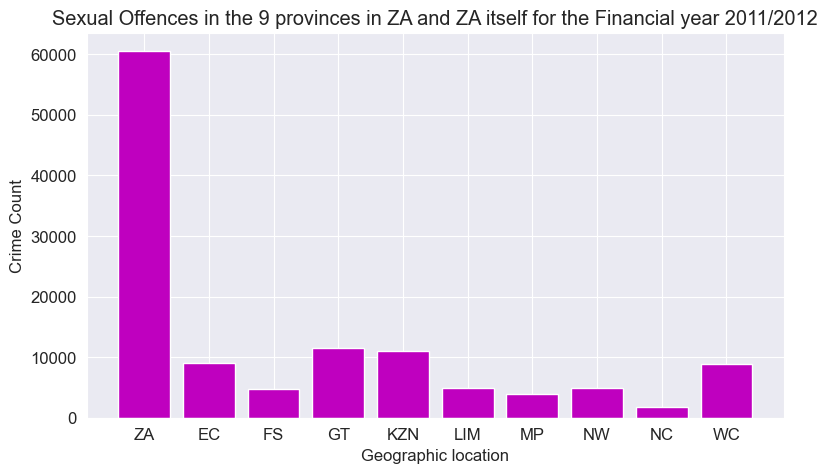

In [49]:

plt.title("Sexual Offences in the 9 provinces in ZA and ZA itself for the Financial year 2011/2012")
plt.xlabel("Geographic location")
plt.ylabel("Crime Count")
plt.bar(crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2011/2012") & (crimeIncidents_rawDf['Crime Category'] == "Sexual Offences") ].Geography,
        height=crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2011/2012") & (crimeIncidents_rawDf['Crime Category'] == "Sexual Offences") ].Count ,
        color="m")
plt.show();

In [50]:
crimeIncidents_rawDf['Financial Year'].unique()

array(['2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021',
       '2021/2022', '2022/2023'], dtype=object)

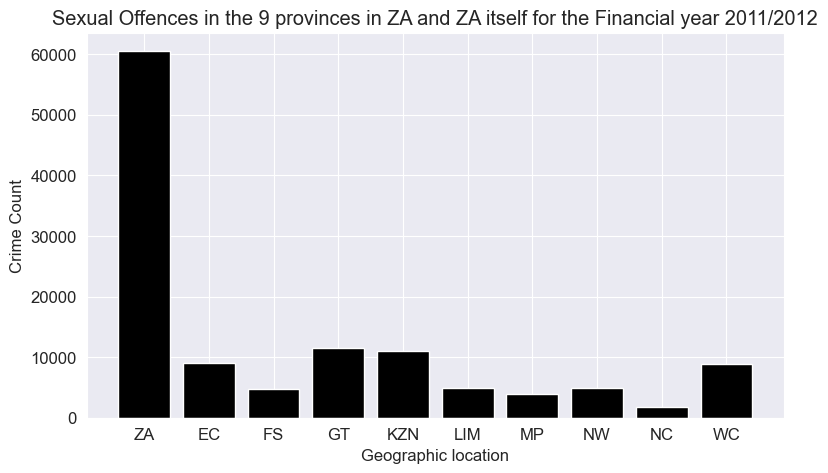

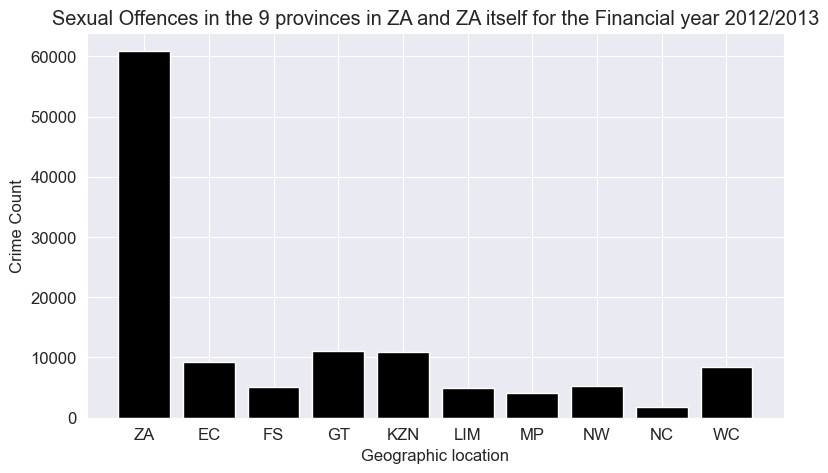

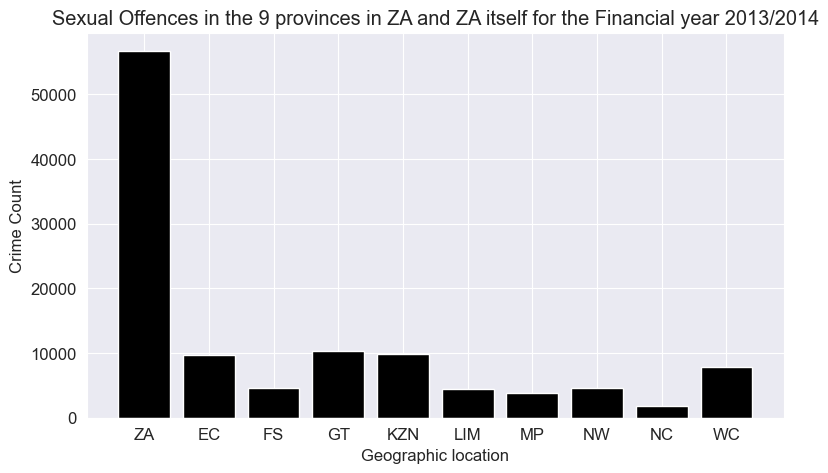

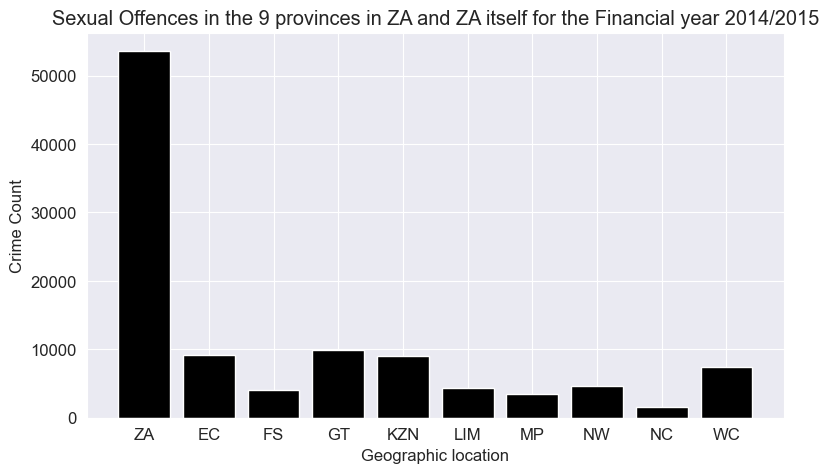

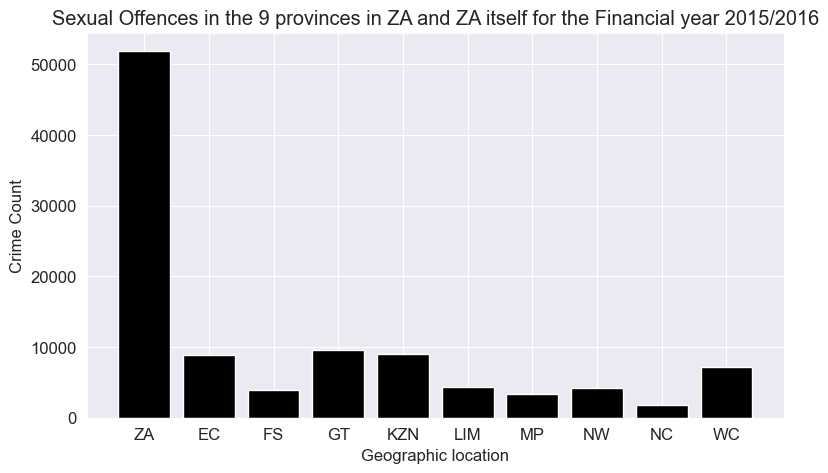

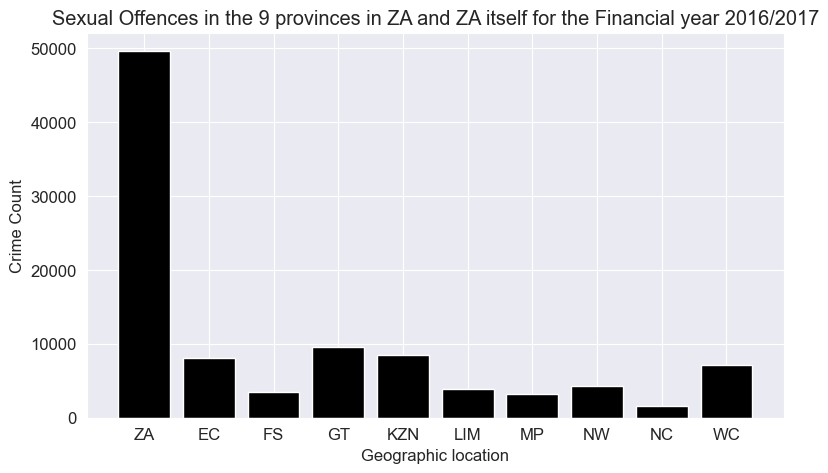

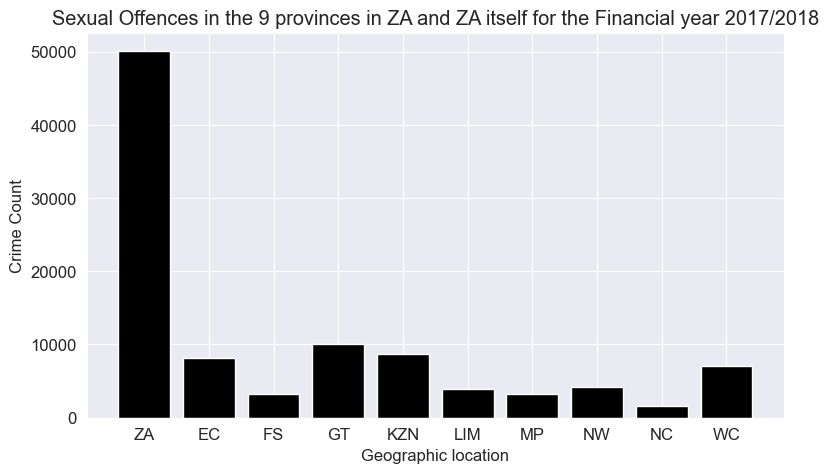

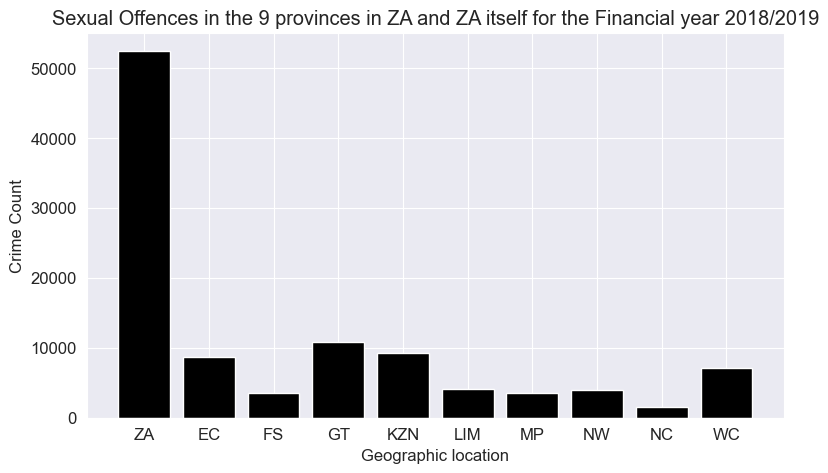

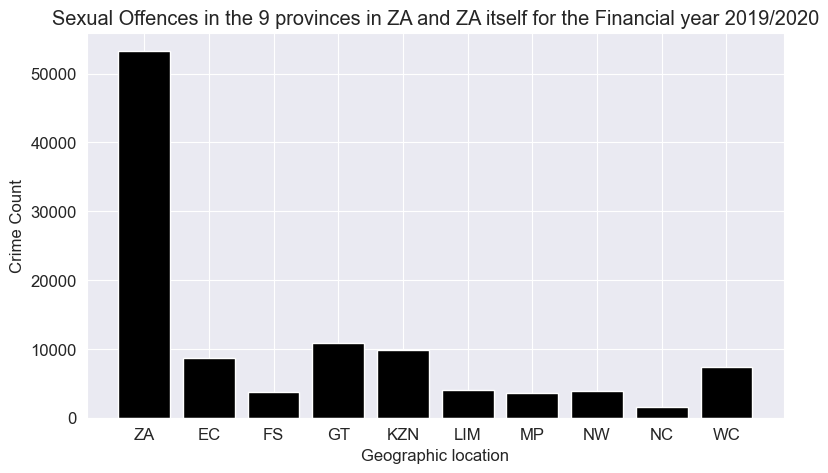

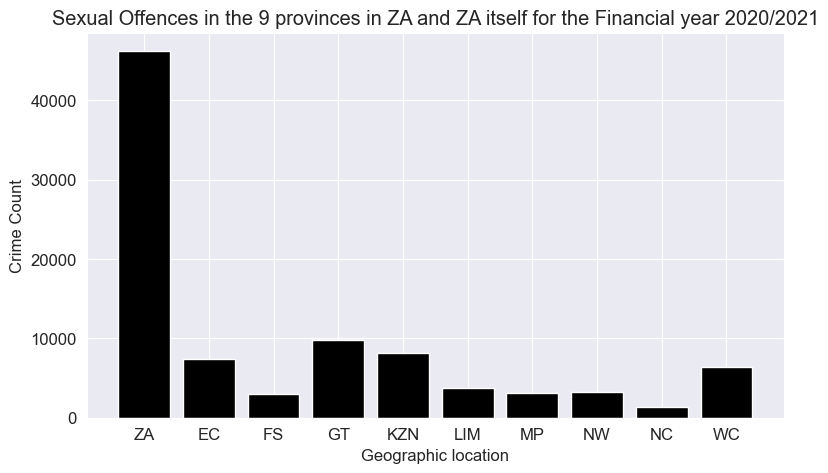

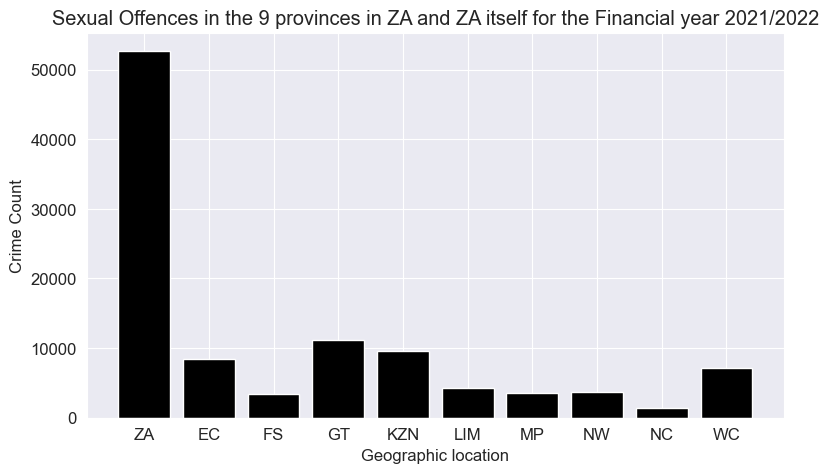

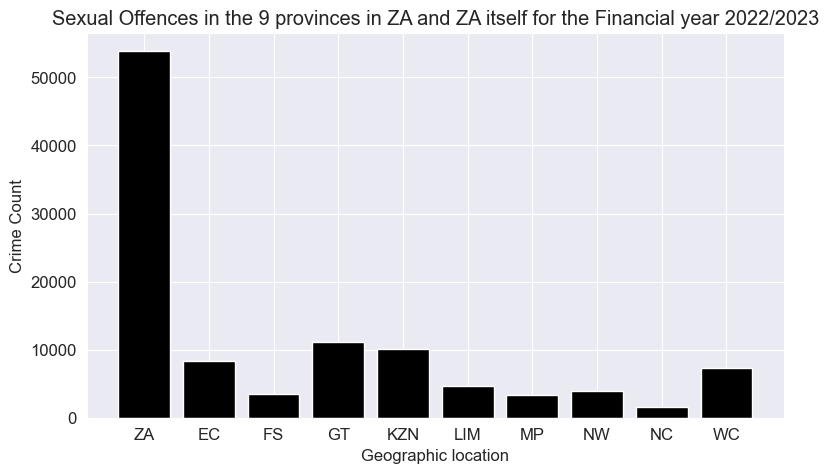

In [51]:

# List of years
years = crimeIncidents_rawDf['Financial Year'].unique()

# Loop over each year
for year in years:
    #plt.figure(figsize=(18,12))

    # Filter data for the current year and "Sexual Offences"
    filtered_data = crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == year) & (crimeIncidents_rawDf['Crime Category'] == "Sexual Offences")]

    # Create bar plot
    plt.bar(filtered_data.Geography, height=filtered_data.Count, color="black")

    # Set title, x-label, and y-label
    plt.title(f"Sexual Offences in the 9 provinces in ZA and ZA itself for the Financial year {year}")
    plt.xlabel("Geographic location")
    plt.ylabel("Crime Count")

    # Display the plot
    plt.show()

<h2><em> Analysis regarding Sexual Offence Crimes for ZA for the Financial Years 2011/2012 to 2022/2023 </em> </h2>

<p>A brief overview, we will not cover every financial year, we will use the previous format of <strong> Pre-Covid(<= 2019/2020), Intra-Covid(2020/2021), and Post-Covid(>= 2021/2022) </strong> </p>

<ol>
    <em>Pre-Covid</em>
    <li>Northern Cape (NC) remained the safest province in terms of Sexual offense crimes. Clearly indicated by it having the smallest bar in the plot over the years</li>
    <li>Gauteng remained the least safe province in terms of Sexual offense crimes. CLearly indicated by it having the largest bar in the plo over the years </li>
    <li>KwaZulu-Natal(KZN) and Eastern Cape(EC) retained their status as the 2nd and 3rd least safe province in terms of Sexual offense crimes. The 2 provinces swapped their respective positions for a few years, but also retained their high crime count.</li>
    <li>Rainbow after the storm, we notice that ZA peaked at slightly above 60000 Sexual Offense crimes, this value dropped due to a variety of reasons to a Value just below 50000. This did see a slight increase but we clearly see <strong>intervention</strong> is possible.</li>
</ol>

<ol>
    <em>Intra-Covid</em>
    <li>As expected we saw a large decrease in Crime but not as large as we would expect.</li>
    <li>5000 may not seem as a large decrease but is actually reflects a  <code>48000/53000 * 100 = 9.43% </code> decrease </li>
    <li>An almost 10% increase is actually alot, yet we have some unanswered important questions: Why was'nt there a larger decrease? Were the Sexual Offences repeat offences? Is there due process?</li>
</ol>

<ol>
    <em>Post-Covid</em>
    <li>As expected we saw an increase, this behaviour is not unique to SA, every country that has a lockdown period would have seen a decrease during covid and an increase after, police intervention, political issues are a few elements that would have an influence on how large that increase would be.</li>
    <li>Merit where merit is due, the increase was still below the largest seen in the data.</li>
    <li>As for indivual provinces, same as Pre-Covid </li>
</ol>


In [52]:
crimeIncidents_rawDf['Crime Category'].unique()

array(['Contact Crimes', 'Sexual Offences', 'Aggravated Robberies',
       'Contact Related Crimes', 'Property Related Crimes',
       'Other Serious Crimes',
       'Crimes Detected as a Result of Police Action'], dtype=object)

<h1>Let's have a look of Police intervention</h1>

In [53]:
crime_category = "Crimes Detected as a Result of Police Action" 


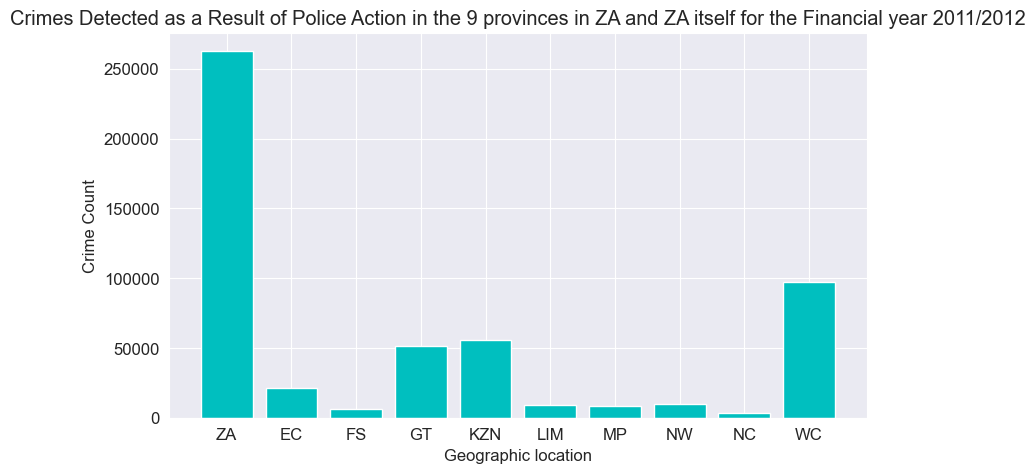

In [54]:

plt.title(f"{crime_category} in the 9 provinces in ZA and ZA itself for the Financial year 2011/2012")
plt.xlabel("Geographic location")
plt.ylabel("Crime Count")
plt.bar(crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2011/2012") & (crimeIncidents_rawDf['Crime Category'] == crime_category) ].Geography,
        height=crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2011/2012") & (crimeIncidents_rawDf['Crime Category'] == crime_category) ].Count ,
        color="c")
plt.show();

<h2>KaapStad Police goes hard</h2>

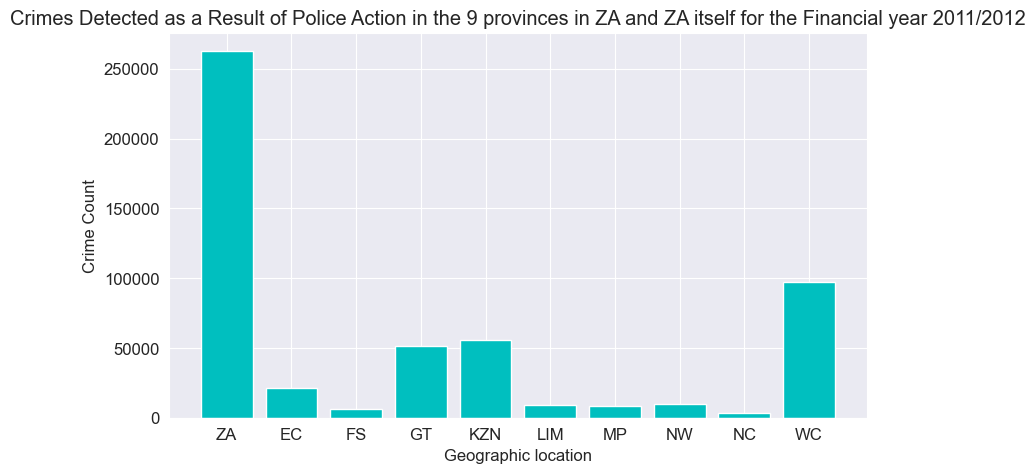

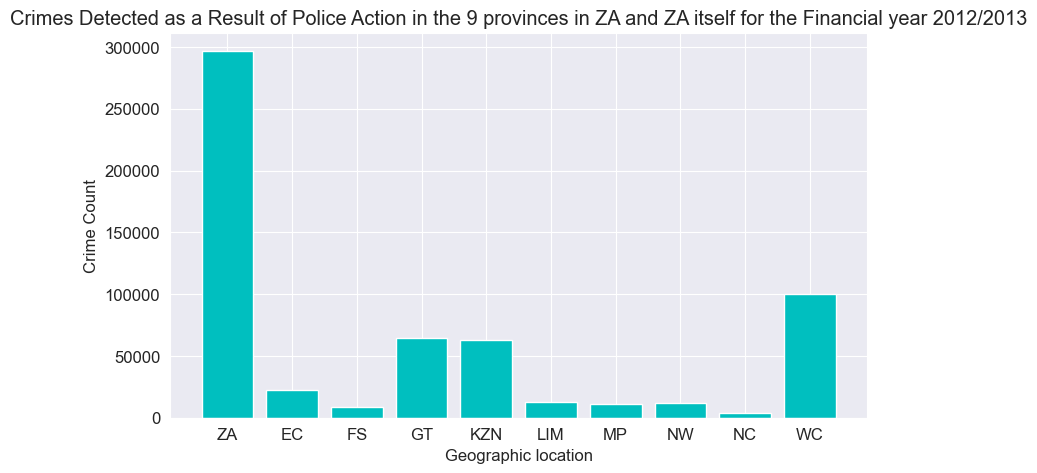

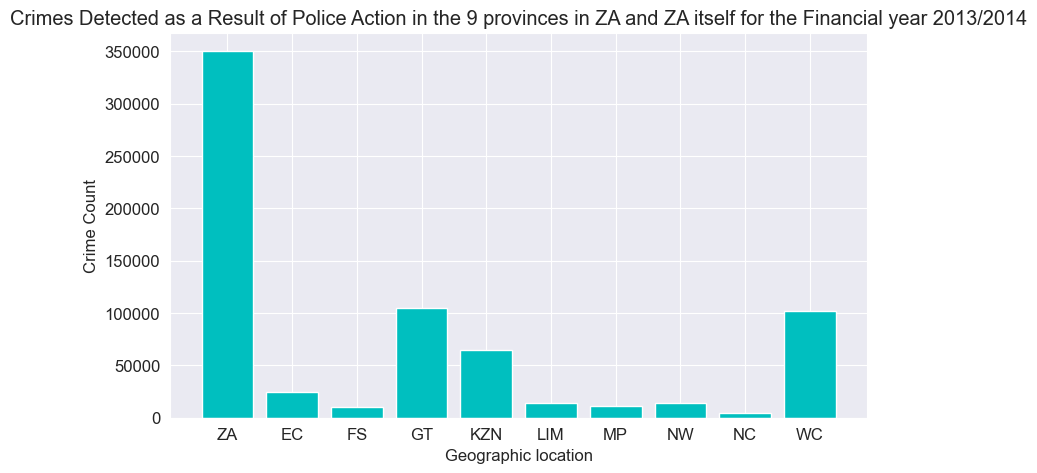

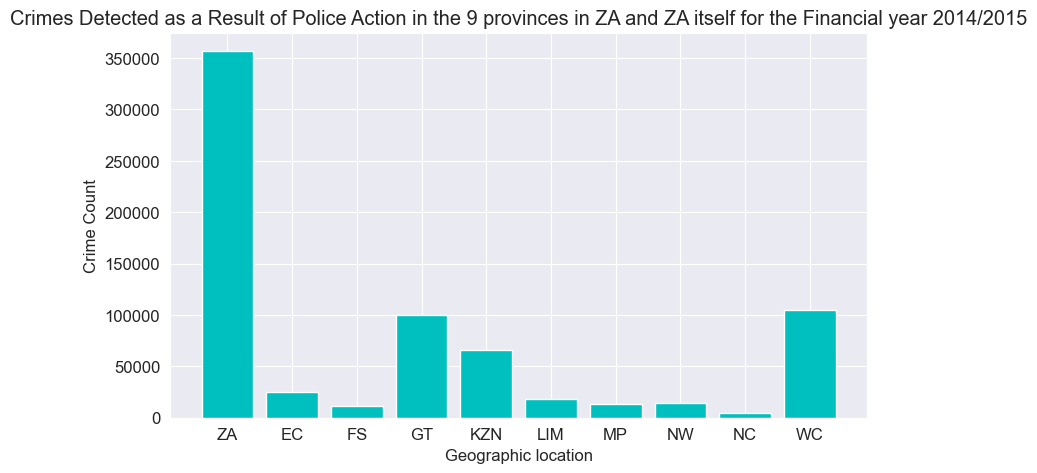

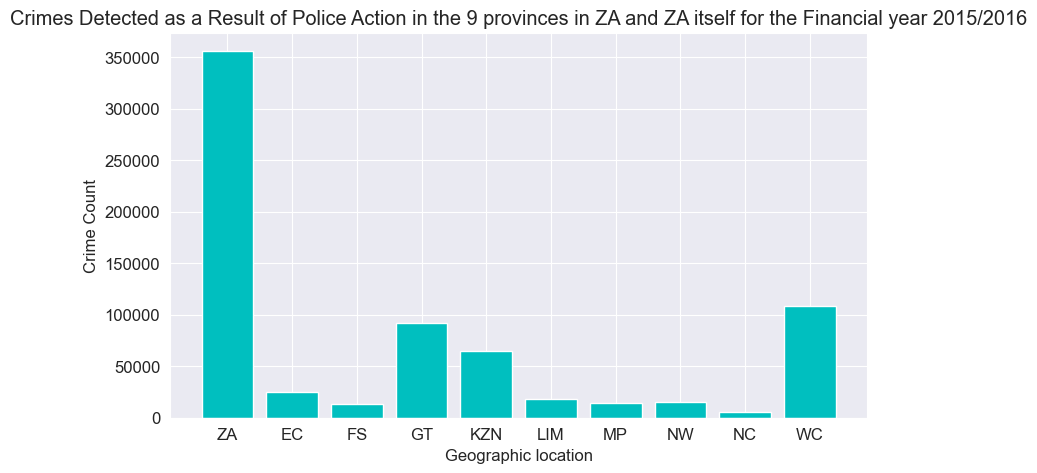

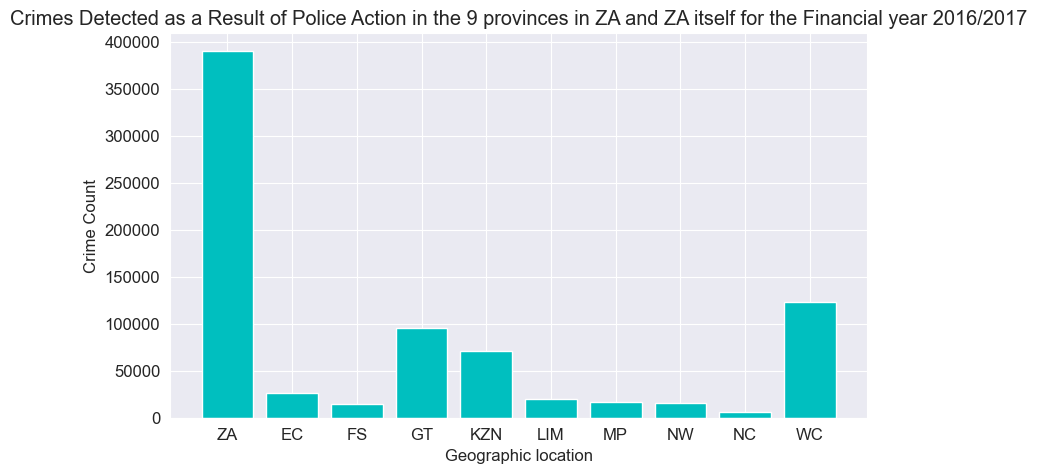

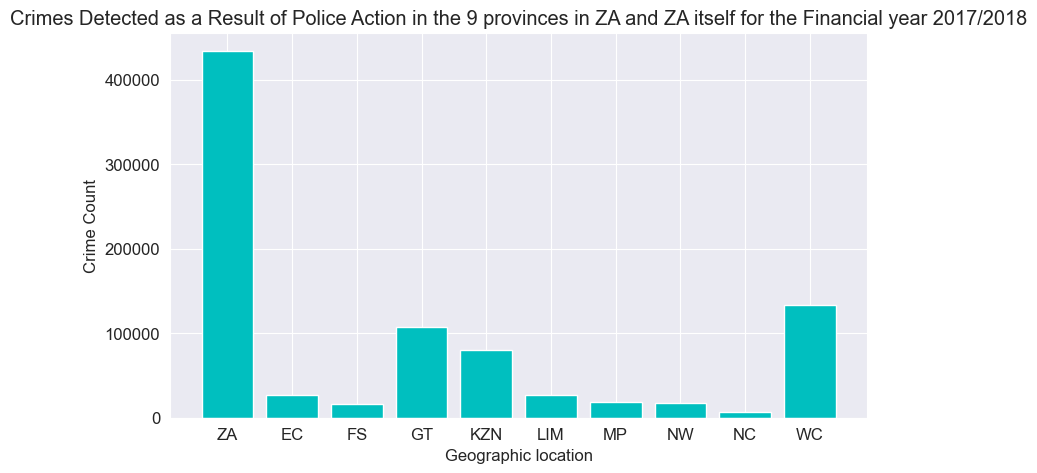

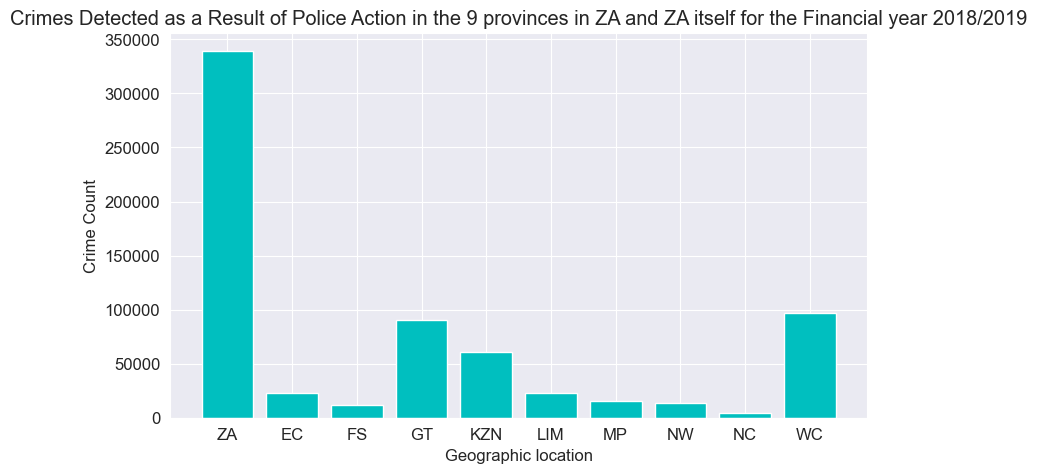

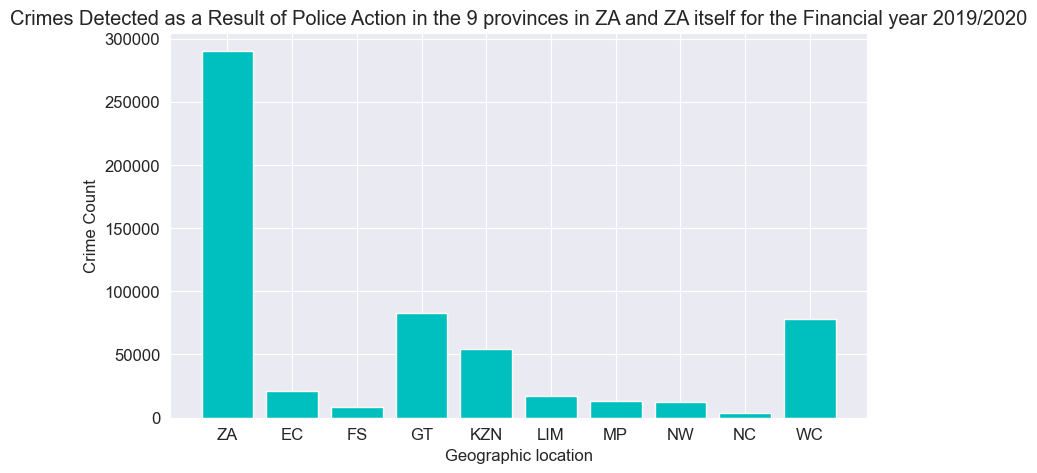

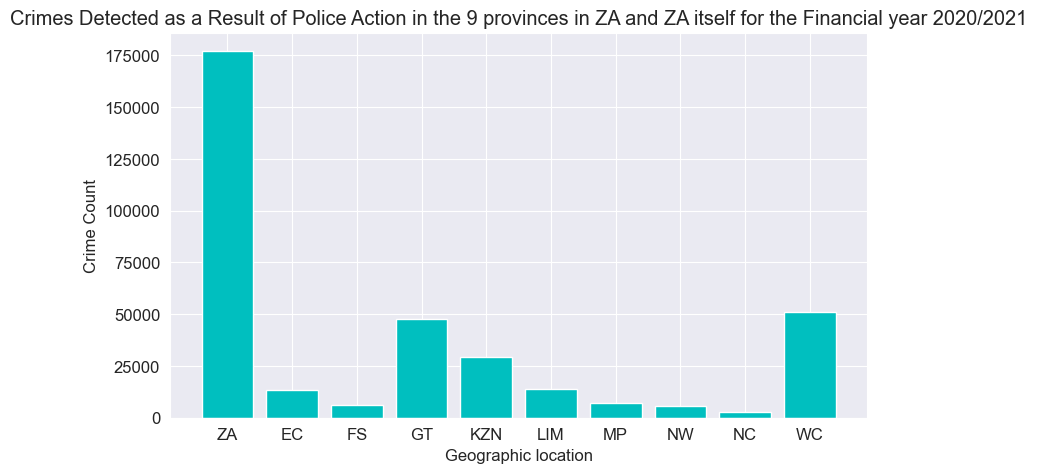

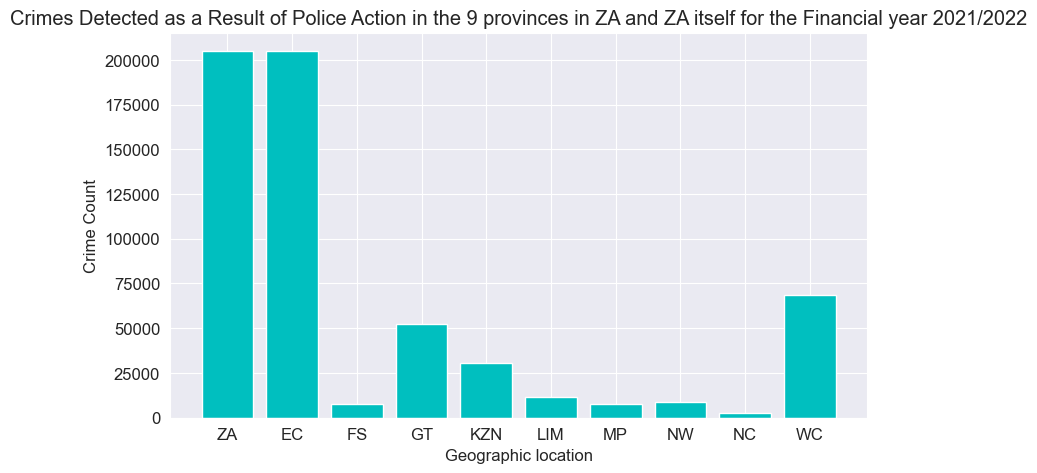

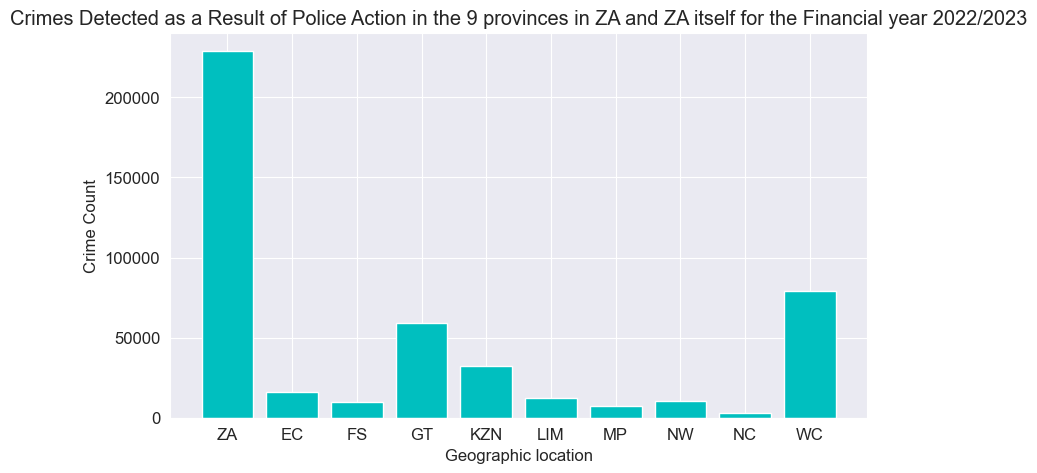

In [55]:

# List of years
years = crimeIncidents_rawDf['Financial Year'].unique()

# Loop over each year
for year in years:
    # Filter data for the current year and "Sexual Offences"
    filtered_data = crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == year) & (crimeIncidents_rawDf['Crime Category'] == crime_category)]

    # Create bar plot
    plt.bar(filtered_data.Geography, height=filtered_data.Count, color="c")

    # Set title, x-label, and y-label
    plt.title(f"{crime_category} in the 9 provinces in ZA and ZA itself for the Financial year {year}")
    plt.xlabel("Geographic location")
    plt.ylabel("Crime Count")

    # Display the plot
    plt.show();


In [56]:
crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography.isin(["EC","ZA"]) ) 
                     & (crimeIncidents_rawDf['Financial Year'] == "2021/2022")
                    & (crimeIncidents_rawDf['Crime Category'] == crime_category)]
# IT has to be a data entry error

,Geography,Crime Category,Financial Year,Count
760,ZA,Crimes Detected as a Result of Police Action,2021/2022,204990
761,EC,Crimes Detected as a Result of Police Action,2021/2022,204990


In [57]:
crimeIncidents_rawDf.loc[760].Count # We need to change this value

204990

In [58]:
crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2021/2022")
                     & (crimeIncidents_rawDf.Geography != "ZA") 
                     & (crimeIncidents_rawDf['Crime Category'] == crime_category) ].Count.sum()

395191

In [59]:
# crimeIncidents_rawDf.loc[760].Count = crimeIncidents_rawDf[(crimeIncidents_rawDf['Financial Year'] == "2021/2022")
#                      & (crimeIncidents_rawDf.Geography != "ZA") 
#                      & (crimeIncidents_rawDf['Crime Category'] == crime_category) ].Count.sum()

print("This would make the appropriate change ASSUMING that EC did see such a large increase in the respective crime category ")
print()
print("We can try searching the Web  but the issue in that approach is: How valid is the data?")

This would make the appropriate change ASSUMING that EC did see such a large increase in the respective crime category 

We can try searching the Web  but the issue in that approach is: How valid is the data?


In [60]:
# the Eastern Cape did see a significant increase in crime during the 2021/2022 period. The latest crime statistics revealed that a total of 1,304 people were murdered across the Eastern Cape in the latest reporting period, which translates to an 8.3% increase in murders in the province, compared to the same period the previous year12.

# Moreover, crime stats for the first quarter of 2021-2022 showed that murder, attempted murder, sexual offences, and assault registered a 60.6% increase, compared to the corresponding period of the previous financial year.


# The areas in the Eastern Cape which have ranked in the top three highest crime rate as revealed in the Crime Statistics for the Fourth Quarter of the last financial year (2022/2023) includes, Lusikisiki in the first position, Mthatha second and Nelson Mandela Bay Municipality in third4

<h2>Analysis of Crime detected by police in ZA for the years 2011/2012 to 2022/2023 </h2>
<p>A brief overview, we will not cover every financial year, we will use the previous format of <strong> Pre-Covid(<= 2019/2020), Intra-Covid(2020/2021), and Post-Covid(>= 2021/2022) </strong> </p>

<ol>
    <em>Pre-Covid</em>
    <li>The Western Cape appears to have the most proactive policing force</li>
    <li>The 2nd and 3rd most proactive police force belongs to Gauteng and KwaZulu-Natal</li>
    <li>Northern Cape very interestingly seems to have the least proactive policing force- this is weird, we know from eariler analyis that NC has the lowest count of Sexual Offences and if we go further back to the line plots we notice that NC seems to have the lowest crime Count in pratically all Crime Categories, and yet it has the lowest number of crimes detected by police.</li>
    <li>This could be due to a variety of reasons: Less crime requires less active policing, Victims/Community members are actively reporting crimes, Police may be lacking funding/general resources, Is the NC crime count so low because crime is not being reported?
    </li>
</ol>

<ol>
    <em>Intra-Covid</em>
    <li>Same as prior Analysis</li>
</ol>

<ol>
    <em>Post-Covid</em>
    <li>We notice an error, this makes our Post-COvid Analysis a little difficult to make</li>
    <li>Using prior data we make the educated guess, that crimes detected by police would have increased</li>

</ol>


In [61]:
crimeIncidents_rawDf.head(20)

,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223
5,ZA,Contact Crimes,2016/2017,608321
6,ZA,Contact Crimes,2017/2018,601366
7,ZA,Contact Crimes,2018/2019,617210
8,ZA,Contact Crimes,2019/2020,621282
9,ZA,Contact Crimes,2020/2021,535217


In [62]:
crimeIncidents_rawDf[crimeIncidents_rawDf['Financial Year'] == "2022/2023"].Count.max()

653659

In [63]:
# I want to determine what trend the data presents, a down-trend(Good), an up-trend(bad), a static trend(static)
# The Geography ZA is the aggregate sum of all provinces for a given year, if I sum the entries of Count for ZA for a given year
# I would have the total crimes commited for that year regardless of Crime Category

# for one year
total_crime_count_per_financial_year = crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & 
                                                           (crimeIncidents_rawDf['Financial Year'] == "2011/2012")].Count.sum()
total_crime_count_per_financial_year

2224792

In [64]:
total_crime_count_per_financial_year = [crimeIncidents_rawDf[(crimeIncidents_rawDf.Geography == "ZA") & 
                                                           (crimeIncidents_rawDf['Financial Year'] == year)].Count.sum() for year in years ]

In [65]:
total_crime_count_per_financial_year # Total crime count for each financial year 

[2224792,
 2272111,
 2330037,
 2335528,
 2310974,
 2319617,
 2285253,
 2205723,
 2116778,
 1704947,
 1803206,
 1938089]

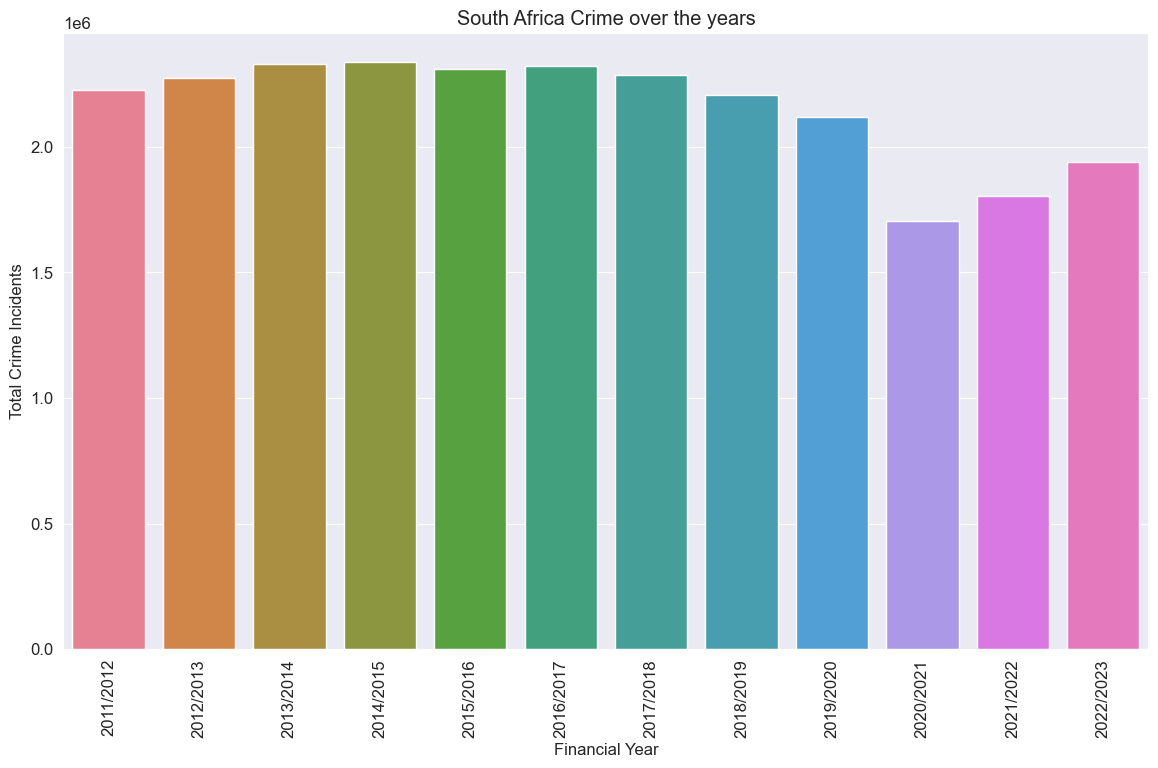

In [66]:
# We will use the Financial year as the x column and the total_crime_count_per_financial_year as the Values

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.xlabel("Financial Year")
plt.ylabel("Total Crime Incidents")
plt.title("South Africa Crime over the years")
sns.barplot(x=years,y=total_crime_count_per_financial_year,hue=years)

plt.show();

C:\Users\ashis\AppData\Local\Temp\ipykernel_1736\3733557049.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


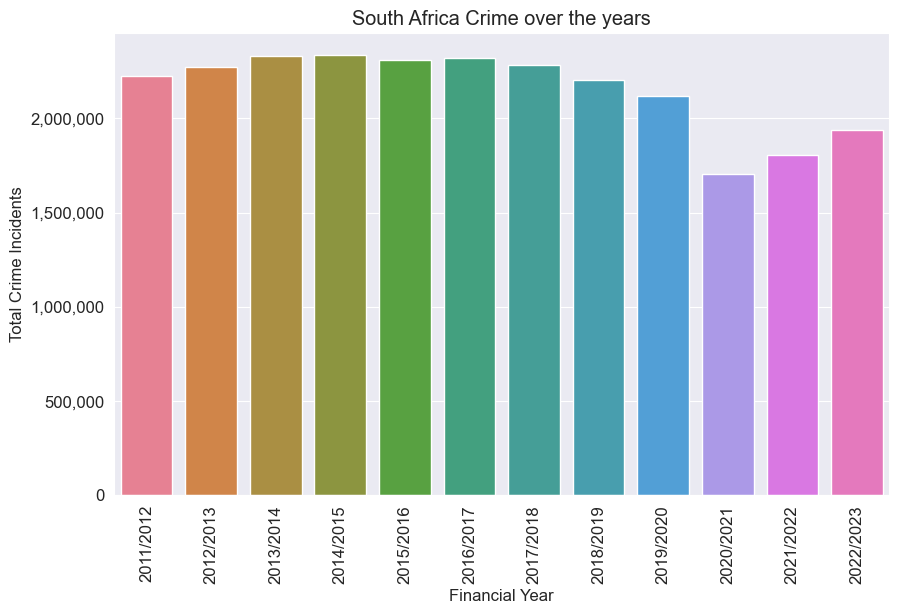

In [67]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=years, y=total_crime_count_per_financial_year, hue=years, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Financial Year")
ax.set_ylabel("Total Crime Incidents")
ax.set_title("South Africa Crime over the years")

# Format y-axis labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show();


<h4><em>Finally some Good News?</em></h4>

<h1><em>South Africa Crime over the years, Trend Analysis</em></h1>
<p>We Will keep this as simple as Possible</p>
<ol>
    <li>We Notice an early up-trend signified by the first 3 barplots.</li>
    <li>The period beginning in 2014/2015 and ending in 2019/2020 shows a down-trend indicating a decrease in crime. </li>
    <ol>
        We must ask ourselves why?
        <li>Active policing</li>
        <li>Stronger laws</li>
        <li>Harsher Punishments</li>
        <li>Civilians taking security in their hands.</li>
        <li>Credit where credit is due</li>
    </ol>
    <li>A large decrease in 2020/2021, This should hold true for any country where covid lockdowns were implemented. This is due to goverment action and should be recognised</li>
    <li>The Goverment appreciation is short lived, if we give the benefit of the doubt and say every country saw an increase in crime post covid, we can look past the up-trend in crime for 2021/2022. </li>
    <li>However we notice a larger increase in the year 2022/2023</li>
    <ol>
        Why is crime increasing?
        <li>Static policing</li>
        <li>Resource scarcity </li>
        <li>Poor training leading to a weaker police force</li>
        <li>Corruption</li>
        <li>Bribery</li>
        <li>Goverment inadequency</li>
    </ol>
    
</ol>

<h3><em>Conclusion</em></h3>
<p><em>South Africa a country under siege?</em></p>
<p><em>Based on the brief data exploratory analysis covered, there is still insufficient data to make an informative conclusion, excluding those that we have already covered.</em></p>